# RFCrypto

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

COIN = 'LUNABUSD'
TIME = '30m'

In [2]:
# !python data_loader.py --coin ETHBUSD --time 15m

## Klines

In [3]:
klines = pd.read_csv(f'./klines/{COIN}_{TIME}.csv')
klines = klines.iloc[:,1:]
klines['timestamp'] = pd.to_datetime(klines.timestamp)
klines

,timestamp,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,time
0,2021-03-01 00:00:00,5.3735,5.4910,5.3520,5.4523,14431.73,1614558599999,7.829955e+04,134,10893.06,2021-03-01
1,2021-03-01 00:30:00,5.4522,5.5124,5.4522,5.4678,15899.78,1614560399999,8.711498e+04,150,13914.33,2021-03-01
2,2021-03-01 01:00:00,5.4734,5.4818,5.3824,5.4237,12331.44,1614562199999,6.695513e+04,159,10331.25,2021-03-01
3,2021-03-01 01:30:00,5.4384,5.4925,5.4314,5.4730,11696.52,1614563999999,6.379311e+04,151,9896.55,2021-03-01
4,2021-03-01 02:00:00,5.4779,5.5939,5.4742,5.5880,16915.80,1614565799999,9.376433e+04,176,14665.95,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...
19358,2022-04-08 21:30:00,96.0200,96.4200,94.4000,94.4300,36009.05,1649455199999,3.431375e+06,5484,16343.31,2022-04-08
19359,2022-04-08 22:00:00,94.4400,94.7700,93.1800,93.9000,60794.53,1649456999999,5.712391e+06,7098,27922.69,2022-04-08
19360,2022-04-08 22:30:00,93.9100,95.2500,93.9100,94.3500,40672.68,1649458799999,3.851756e+06,4769,20982.08,2022-04-08
19361,2022-04-08 23:00:00,94.3600,94.7300,93.7900,93.9500,46468.25,1649460599999,4.378911e+06,4585,21934.74,2022-04-08


## Labeled data

In [4]:
import json

with open(f'./labeled/{COIN}_{TIME}_labels.json', 'r') as fIn:
    labels = json.load(fIn)

labeled_data = labels[0]['annotations'][0]['result']
labeled_data

[{'value': {'start': '2021-03-02 19:30:00',
   'end': '2021-03-03 12:00:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'EDqh-Y3lGx',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-03-01 01:00:00',
   'end': '2021-03-01 23:00:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'PG6lQumFBq',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-03-05 01:00:00',
   'end': '2021-03-05 22:00:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'Sgha3uZUJk',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-03-04 09:00:00',
   'end': '2021-03-04 17:00:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'kQYAZG9kii',
  'from_name': 'predictable',
  'to_name': 'stock',
  'ty

In [5]:
dict_labels = {}
count = 0
for value in labeled_data:
    if value['value']['end'] == '0NaN-NaN-NaN NaN:NaN:NaN':
        pass
    else:
        count +=1
        dict_labels[count] = [value['value']['start'], 1]
        count +=1
        dict_labels[count] = [value['value']['end'], 2]

labels = pd.DataFrame.from_dict(dict_labels, orient='index', columns=['timestamp', 'label'])
labels['timestamp'] = pd.to_datetime(labels.timestamp)

labels

,timestamp,label
1,2021-03-02 19:30:00,1
2,2021-03-03 12:00:00,2
3,2021-03-01 01:00:00,1
4,2021-03-01 23:00:00,2
5,2021-03-05 01:00:00,1
...,...,...
344,2022-03-30 17:00:00,2
345,2022-03-23 11:00:00,1
346,2022-03-23 15:00:00,2
347,2022-04-01 02:00:00,1


In [6]:
klines_label = klines.merge(labels, on='timestamp', how='outer')
klines_label = klines_label.fillna(0)

for i, row in klines_label.iterrows():
    if i > 1:
        last_row = klines_label.label.iloc[i-1]
        if last_row == 0 and row.label == 1:
            klines_label.loc[i, 'label'] = 1
        elif last_row == 1 and row.label == 0:
            klines_label.loc[i, 'label'] = 1
        elif last_row == 1 and row.label == 2:
            klines_label.loc[i, 'label'] = 2
        elif last_row == 2 and row.label == 0:
            klines_label.loc[i, 'label'] = 0
        else:
            klines_label.loc[i, 'label'] = 0
    else:
        pass

klines_label = klines_label.replace(2, 1)
klines_label['label'] = klines_label.label.shift(1)
klines_label = klines_label.fillna(0)
# klines['time'] = pd.to_datetime(klines['timestamp'].dt.strftime('%Y-%m-%d'))
klines_label

,timestamp,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,time,label
0,2021-03-01 00:00:00,5.3735,5.4910,5.3520,5.4523,14431.73,1614558599999,7.829955e+04,134,10893.06,2021-03-01,0.0
1,2021-03-01 00:30:00,5.4522,5.5124,5.4522,5.4678,15899.78,1614560399999,8.711498e+04,150,13914.33,2021-03-01,0.0
2,2021-03-01 01:00:00,5.4734,5.4818,5.3824,5.4237,12331.44,1614562199999,6.695513e+04,159,10331.25,2021-03-01,0.0
3,2021-03-01 01:30:00,5.4384,5.4925,5.4314,5.4730,11696.52,1614563999999,6.379311e+04,151,9896.55,2021-03-01,1.0
4,2021-03-01 02:00:00,5.4779,5.5939,5.4742,5.5880,16915.80,1614565799999,9.376433e+04,176,14665.95,2021-03-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19358,2022-04-08 21:30:00,96.0200,96.4200,94.4000,94.4300,36009.05,1649455199999,3.431375e+06,5484,16343.31,2022-04-08,0.0
19359,2022-04-08 22:00:00,94.4400,94.7700,93.1800,93.9000,60794.53,1649456999999,5.712391e+06,7098,27922.69,2022-04-08,0.0
19360,2022-04-08 22:30:00,93.9100,95.2500,93.9100,94.3500,40672.68,1649458799999,3.851756e+06,4769,20982.08,2022-04-08,0.0
19361,2022-04-08 23:00:00,94.3600,94.7300,93.7900,93.9500,46468.25,1649460599999,4.378911e+06,4585,21934.74,2022-04-08,0.0


## Merge & Feature Eng.

In [7]:
import pandas_ta as pta
import numpy as np

# df = klines_label.merge(greed, left_on='time', right_on='time')
df = klines_label.copy()
df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume', 'numberoftrades', 'label']]

df['candle_hight'] = 100 * (df.high - df.low) / ((df.high + df.low) / 2)
df['price_change'] = df['close'].pct_change() * 100
df['FASTMA'] = df.close.rolling(10).mean() # 10 $77 %30
df['SLOWMA'] = df.close.rolling(200).mean() # 200 $77 %30
df['FASTSlope'] = np.degrees(np.arctan(df['FASTMA'].diff()/10))
df['SLOWSlope'] = np.degrees(np.arctan(df['SLOWMA'].diff()/200))
df['RSI'] = pta.rsi(df.close)
df['Slope'] = pta.slope(df.close, length=7)
df['AROON'] = pta.aroon(df['high'], df['low'])['AROONU_14']
df['BBAND'] = pta.bbands(df['close'], length=14, std=2, talib=False)['BBP_14_2.0']
df['OBV'] = pta.bbands(close=df['close'], volume=df['volume'])['BBP_5_2.0']
df['MACD'] = pta.macd(close=df['close'])['MACD_12_26_9']

df = df.dropna()
df = df.sort_values('timestamp')
df

,timestamp,open,high,low,close,volume,numberoftrades,label,candle_hight,price_change,FASTMA,SLOWMA,FASTSlope,SLOWSlope,RSI,Slope,AROON,BBAND,OBV,MACD
200,2021-03-05 04:00:00,7.2779,7.3265,7.2450,7.2941,12156.52,223,1.0,1.118622,0.222592,7.20327,6.818157,-0.126566,0.002638,46.939377,0.016114,0.000000,0.545208,0.744131,-0.094742
201,2021-03-05 04:30:00,7.2851,7.3499,7.1926,7.2011,21637.29,227,1.0,2.163314,-1.275003,7.17596,6.826823,-0.156474,0.002483,43.928235,0.031957,0.000000,0.415213,0.189170,-0.093905
202,2021-03-05 05:00:00,7.2011,7.3378,7.1824,7.2941,19114.54,229,1.0,2.140466,1.291469,7.18462,6.836175,0.049618,0.002679,47.551591,0.037486,21.428571,0.580761,0.703763,-0.084760
203,2021-03-05 05:30:00,7.2934,7.4465,7.2677,7.3969,15105.90,286,1.0,2.430305,1.409358,7.20618,6.845795,0.123530,0.002756,51.297946,0.039557,14.285714,0.759795,0.916963,-0.068429
204,2021-03-05 06:00:00,7.3952,7.4349,7.3467,7.3467,11484.42,208,1.0,1.193376,-0.678663,7.24311,6.854589,0.211592,0.002519,49.440753,0.020129,7.142857,0.719477,0.654017,-0.058859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19358,2022-04-08 21:30:00,96.0200,96.4200,94.4000,94.4300,36009.05,5484,0.0,2.117178,-1.655905,96.79100,109.469050,-2.416448,-0.022961,28.674750,-0.368571,14.285714,0.036895,0.062419,-1.676243
19359,2022-04-08 22:00:00,94.4400,94.7700,93.1800,93.9000,60794.53,7098,0.0,1.691939,-0.561262,96.45300,109.380250,-1.935860,-0.025439,27.274564,-0.550000,7.142857,0.026671,0.138780,-1.803975
19360,2022-04-08 22:30:00,93.9100,95.2500,93.9100,94.3500,40672.68,4769,0.0,1.416790,0.479233,96.08100,109.283650,-2.130421,-0.027674,30.382869,-0.507143,0.000000,0.136174,0.331493,-1.847594
19361,2022-04-08 23:00:00,94.3600,94.7300,93.7900,93.9500,46468.25,4585,0.0,0.997242,-0.423953,95.77500,109.182000,-1.752704,-0.029121,29.188651,-0.448571,0.000000,0.118149,0.312675,-1.892623


## Model

In [8]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'numberoftrades',
       'label', 'candle_hight', 'price_change', 'FASTMA', 'SLOWMA',
       'FASTSlope', 'SLOWSlope', 'RSI', 'Slope', 'AROON', 'BBAND', 'OBV',
       'MACD'],
      dtype='object')

In [9]:
ml = df.copy()

to_remove = ['timestamp', 'numberoftrades', 'FASTMA', 'SLOWMA', 'SLOWSlope', 'FASTSlope', 'open', 'high', 'low', 'close','label']

columns = df.columns
columns = [i for i in columns if i not in to_remove]
columns.append('label')

ml = ml[columns] # label at the end
ml = ml.astype('float32')
ml.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,19163.0,33381.273438,32441.544922,608.880005,13183.194824,24051.259766,42394.468750,521521.625000
candle_hight,19163.0,1.610611,1.244601,0.142670,0.875716,1.284521,1.939445,24.055246
price_change,19163.0,0.021254,1.256237,-15.884393,-0.567049,0.000000,0.579684,17.027477
RSI,19163.0,50.583572,11.753929,13.235102,42.440596,50.139866,58.516159,89.355003
Slope,19163.0,0.004574,0.182151,-1.230000,-0.058329,-0.000429,0.062386,1.477143
AROON,19163.0,47.819458,36.732693,0.000000,14.285714,42.857143,85.714287,100.000000
BBAND,19163.0,0.501087,0.325589,-0.362409,0.235348,0.497371,0.761490,1.381893
OBV,19163.0,0.498470,0.286671,0.000844,0.239288,0.497562,0.757957,0.999121
MACD,19163.0,0.033435,0.554687,-3.159347,-0.165981,0.002686,0.209911,4.121352
label,19163.0,0.369984,0.482813,0.000000,0.000000,0.000000,1.000000,1.000000


<AxesSubplot:>

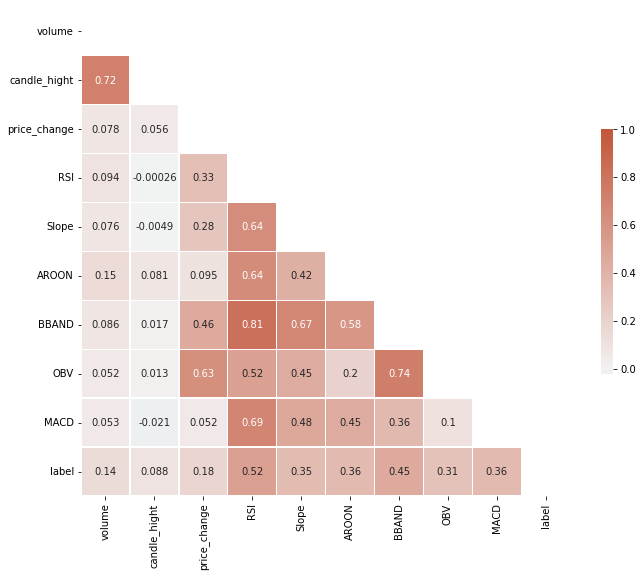

In [10]:
import seaborn as sns

corr = ml.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
# pd.plotting.scatter_matrix(ml, figsize=(10,10), color='black', alpha=0.75, diagonal='kde', grid=True)

In [12]:
# Function from https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [13]:
total_columns = len(ml.columns)

reframed = series_to_supervised(ml, 28, 1)
variable_name = f'var10'

# remove the label column from each time step
columns = []
for columnName, columnData in reframed.iteritems():
    if variable_name in columnName:
        if columnName == variable_name+'(t)':
            pass
        else:
            columns.append(columnName)

reframed = reframed.drop(columns, axis=1)

# remove the last time step but not the label
columns_to_remove = reframed.iloc[:, -total_columns:-1].columns
reframed = reframed.drop(columns_to_remove, axis=1)
reframed

,var1(t-28),var2(t-28),var3(t-28),var4(t-28),var5(t-28),var6(t-28),var7(t-28),var8(t-28),var9(t-28),var1(t-27),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t)
228,12156.519531,1.118622,0.222592,46.939377,0.016114,0.000000,0.545208,0.744131,-0.094742,21637.289062,...,37373.281250,3.137217,1.993936,63.185051,0.013257,57.142857,0.735432,0.907200,0.208371,1.0
229,21637.289062,2.163314,-1.275003,43.928234,0.031957,0.000000,0.415213,0.189170,-0.093905,19114.539062,...,35546.710938,2.379259,-0.890578,60.529209,-0.027614,50.000000,0.635909,0.689934,0.205136,1.0
230,19114.539062,2.140466,1.291469,47.551590,0.037486,21.428572,0.580761,0.703763,-0.084760,15105.900391,...,24342.080078,1.419718,0.349515,61.212139,-0.017800,42.857143,0.642527,0.670749,0.202570,1.0
231,15105.900391,2.430305,1.409358,51.297947,0.039557,14.285714,0.759795,0.916963,-0.068429,11484.419922,...,26178.089844,1.996954,0.695390,62.603363,0.023029,35.714287,0.699294,0.764457,0.202854,1.0
232,11484.419922,1.193376,-0.678663,49.440754,0.020129,7.142857,0.719477,0.654017,-0.058859,24971.759766,...,24962.000000,2.175167,0.579280,63.777016,0.054786,28.571428,0.751776,0.873633,0.204626,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19358,52791.320312,1.597662,1.293484,43.035763,-0.368571,50.000000,0.138430,0.387827,-0.160597,37500.449219,...,26116.449219,1.498439,-0.497409,33.459820,-0.292857,21.428572,0.178225,0.281386,-1.542792,0.0
19359,37500.449219,1.394268,-0.348264,41.217888,-0.411429,42.857143,0.124528,0.384302,-0.254018,26612.849609,...,36009.050781,2.117178,-1.655905,28.674749,-0.368571,14.285714,0.036895,0.062419,-1.676243,0.0
19360,26612.849609,1.038180,-0.116494,40.602219,-0.352857,35.714287,0.159573,0.437810,-0.333888,20696.449219,...,60794.531250,1.691939,-0.561262,27.274565,-0.550000,7.142857,0.026671,0.138780,-1.803975,0.0
19361,20696.449219,0.855615,0.165225,41.925640,-0.288571,28.571428,0.233291,0.603993,-0.379099,25244.910156,...,40672.679688,1.416790,0.479233,30.382870,-0.507143,0.000000,0.136174,0.331493,-1.847594,0.0


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

X = reframed.drop([variable_name+'(t)'], axis=1)
y = reframed[variable_name+'(t)']

X1 = df.drop(['label'], axis=1)
y1 = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
_, X_backtest, _, y_backtest = train_test_split(X1, y1, test_size=0.3, random_state=42, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(13394, 252)
(13394,)
0.0    8683
1.0    4711
Name: var10(t), dtype: int64


### Random Forest

In [52]:
import pickle
model = pickle.load(open(f'./models/{COIN}.sav', 'rb'))

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#### Predict and confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2674,  716],
       [ 842, 1509]], dtype=int64)

#### Precision, Recall and F1 Score

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision Score, Recall Score and F1 Score
precision_score_p = precision_score(y_test, y_pred)
print('Precision Score: ', precision_score_p)

recall_score_p = recall_score(y_test, y_pred)
print('Recall Score: ', recall_score_p)

f1_score_p = f1_score(y_test, y_pred)
print('F1 Score: ', f1_score_p)

Precision Score:  0.6782022471910112
Recall Score:  0.6418545299872395
F1 Score:  0.659527972027972


#### Precision Recall Curve

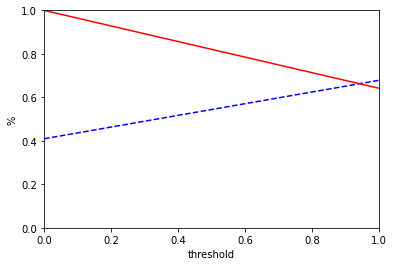

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
    plt.xlabel('threshold')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.ylabel('%')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

#### Roc Curve

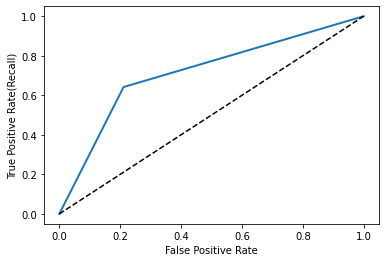

ROC Score:  0.7153225452296078


In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# plot the Roc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate(Recall)')

plot_roc_curve(fpr, tpr)
plt.show()

print('ROC Score: ', roc_auc_score(y_test, y_pred))

## BackTest & Visualise

In [25]:
t_start = 0
t_end = 5500
threshold = .45
start = len(X_backtest) - len(X_test) - 1

yhat = model.predict_proba(X_test)
yhat = [i[1] for i in yhat]

price = X_backtest.iloc[start:,4].to_list()
slowma = X_backtest.iloc[start:,9].to_list()
slowma100 = X_backtest.iloc[start:,10].to_list()
slope = X_backtest.iloc[start:,11].to_list()
slope100 = X_backtest.iloc[start:,12].to_list()

new_order = False
amount = 100
leverage = 1
quantity=0
total=0
bought_price=0
total_earned = []
bought_at = []
amount_plot = []
win_percentage = []
prediction_data = []
price_data = []

for i in range(t_start, t_end):
    try:
        prediction = yhat[i]
        coin_price = price[i]
        price_data.append(coin_price)
        amount_plot.append(amount)
        prediction_data.append(prediction)

        if (new_order is False) and ((prediction > threshold) and (slope100[i] > 0)):
            quantity = round(amount / coin_price, 5)
            bought_price = coin_price
            total_earned.append(0)
            bought_at.append(1)
            new_order = True

        elif (new_order is True) and (((prediction < threshold) and ((slope100[i] < 0) or (slope[i] < 0)))  or (coin_price < bought_price * .99)):
            total_earn = (quantity * coin_price - amount) * leverage
            win_percentage.append(1 - bought_price / coin_price)
            # amount = amount + total_earn
            total += total_earn
            total_earned.append(total_earn)
            bought_at.append(0)

            new_order = False

        else:
            bought_at.append(0)
            total_earned.append(0)
            pass

    except:
        pass

total

52.30856369999988

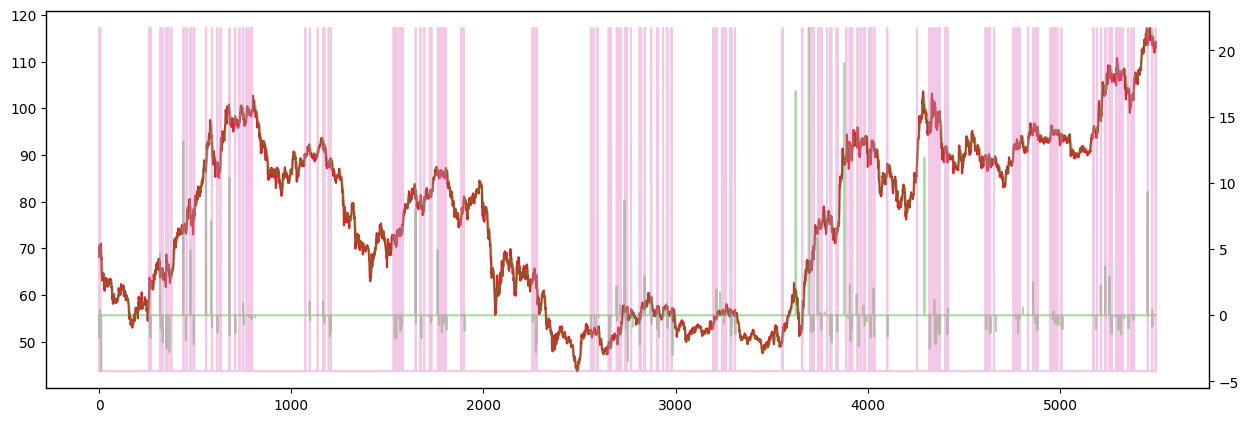

In [26]:
fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(price_data, color=color)
# ax1.axes.yaxis.set_visible(False)

# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.plot(prediction_data, color=color, alpha=0.1)
# ax2.axhline(y=.45, color=color, linestyle='-')
# ax2.axes.yaxis.set_visible(False)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.plot(total_earned, color=color, alpha=0.4)
# ax3.axes.yaxis.set_visible(False)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.plot(slowma[t_start:t_end], color=color, alpha=0.4)
ax3.axes.yaxis.set_visible(False)
#
ax3 = ax1.twinx()
color = 'tab:pink'
ax3.plot(bought_at, color=color, alpha=0.4)
ax3.axes.yaxis.set_visible(False)

In [22]:
positive = 0
negative = 0

total_earn = 0
total_loss = 0

for i in total_earned:
    if i == 0:
        pass
    elif i > 0:

        positive = positive + 1
        total_earn = total_earn + i
    else:
        negative = negative + 1
        total_loss = total_loss + i

perc = positive/(positive+negative)

print('Total Trades: ', positive+negative)
print('Total Positive: ', positive, total_earn)
print('Total Negative: ', negative, total_loss)
print('Winning Rate: ', perc)
print('Average Profit: ', np.mean(win_percentage))

Total Trades:  79
Total Positive:  21 106.15509059999994
Total Negative:  58 -61.79207950000007
Winning Rate:  0.26582278481012656
Average Profit:  0.003958475075110676


In [23]:
pd.Series(win_percentage).sort_values(ascending=False) * 100

1     17.827381
14    15.996364
0     14.478958
31    10.640663
76     8.524128
        ...    
12    -2.071438
34    -2.132413
35    -2.231491
22    -2.378864
32    -2.588757
Length: 79, dtype: float64

#### Feature Importance

[]

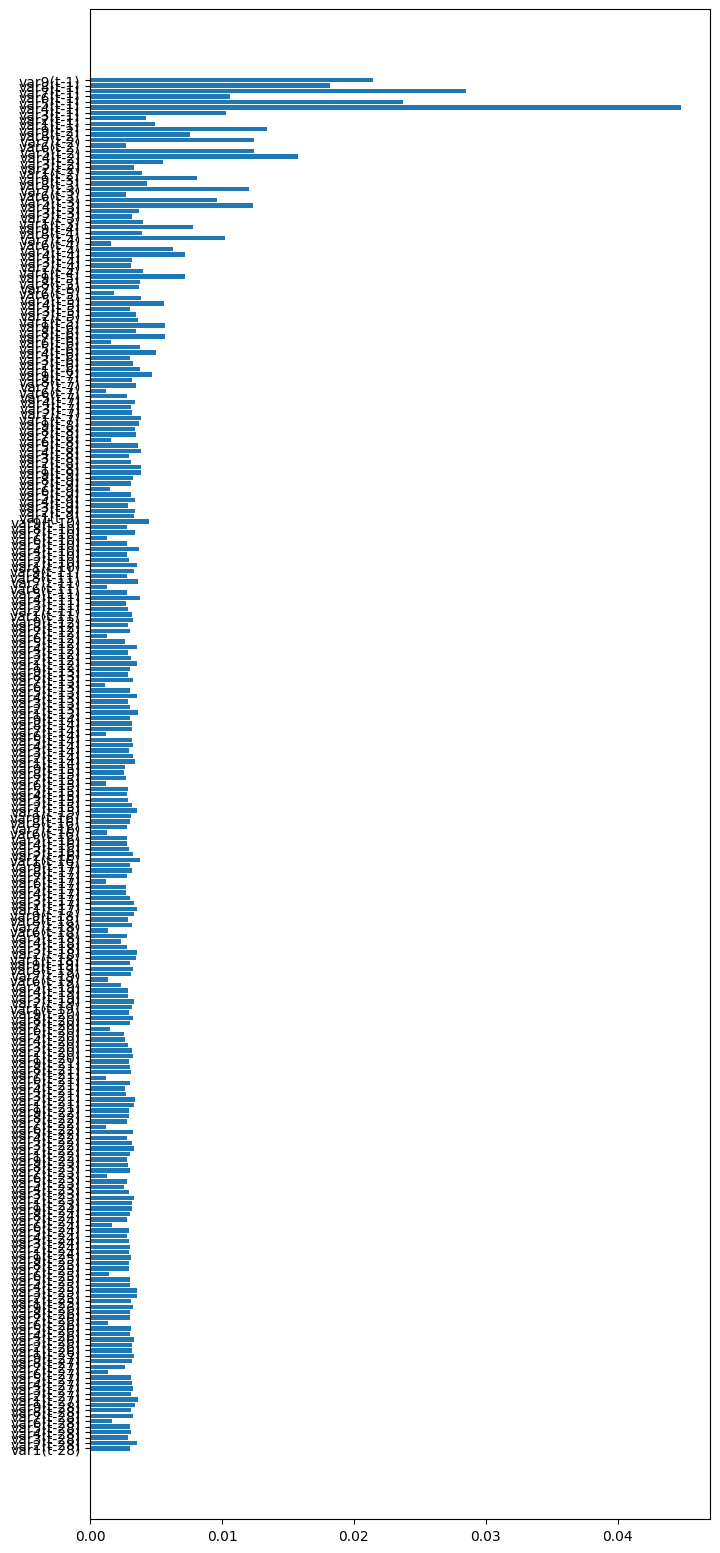

In [67]:
from matplotlib.pyplot import figure
columns = list(X_train.columns)
features_importance = model.feature_importances_
figure(figsize=(8, 20), dpi=100)
plt.barh(columns, features_importance)
plt.plot()

## Save Model!

In [24]:
import pickle
filename = f'./models/{COIN}.sav'
pickle.dump(model, open(filename, 'wb'))

## Test with Real data

In [29]:
from sqlalchemy import create_engine
import json

def db_connection():
    f = open("keys.json")
    data = json.load(f)
    engine = create_engine(data['connection'])

    return engine

with open('keys.json', 'r') as fIn:
    keys = json.load(fIn)

In [18]:
import pandas as pd
# AND timestamp BETWEEN '2022-03-30 09:00:00' AND '2022-03-30 23:00:00'
data = pd.read_sql_query("SELECT timestamp, price, prediction FROM data WHERE COIN = 'ETHBUSD' AND timestamp BETWEEN '2022-04-06 00:00:00' AND '2022-04-06 09:00:00'", db_connection(), index_col='timestamp')
data

,price,prediction
timestamp,,
2022-04-06 00:00:31,3446.33,0.223333
2022-04-06 00:01:03,3446.14,0.230000
2022-04-06 00:01:36,3443.64,0.223333
2022-04-06 00:02:08,3440.78,0.223333
2022-04-06 00:02:40,3439.81,0.220000
...,...,...
2022-04-06 08:57:51,3350.70,0.230000
2022-04-06 08:58:23,3348.48,0.233333
2022-04-06 08:58:55,3345.95,0.226667


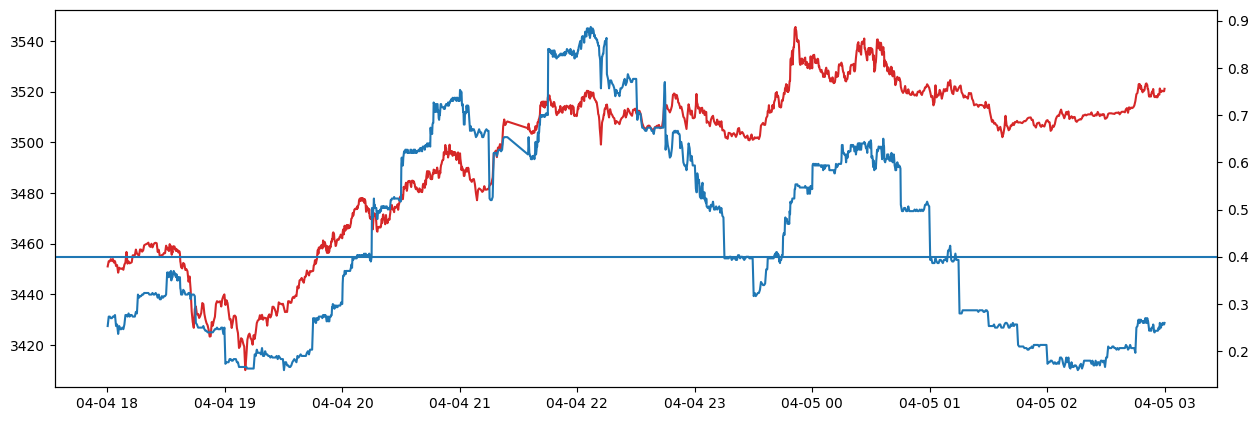

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(data.price, color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(data.prediction, color=color)
# ax2.set_ylim(0,1)
ax2.axhline(y=.4, color=color, linestyle='-')

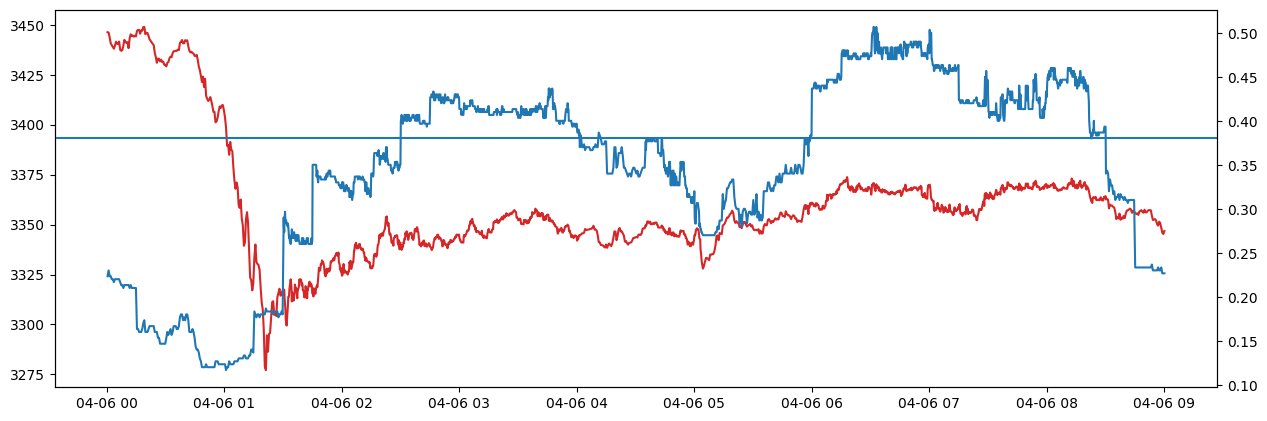

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(data.price, color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(data.prediction, color=color)
# ax2.set_ylim(0,1)
ax2.axhline(y=.38, color=color, linestyle='-')